# 📊 ADHD EEG Model Evaluation

This notebook loads the trained CNN model and visualizes its evaluation results using confusion matrix, ROC curve, and other metrics.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder

# Load data
features = np.load('../../notebooks/CNN/data_to_wae_cnn.npz')
X, y = features['X'], features['y']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X = X[..., np.newaxis]

FileNotFoundError: [Errno 2] No such file or directory: '../../notebooks/CNN/data_to_wae_cnn.npz'

In [ ]:
# Load model
model = load_model('../../notebooks/eeg_bandpower_cnn_model.h5')
y_prob = model.predict(X)
y_pred = (y_prob > 0.5).astype(int).flatten()

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
# Classification report
print(classification_report(y_encoded, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

        ADHD       0.56      1.00      0.72      4682
     Control       1.00      0.00      0.00      3717

    accuracy                           0.56      8399
   macro avg       0.78      0.50      0.36      8399
weighted avg       0.75      0.56      0.40      8399



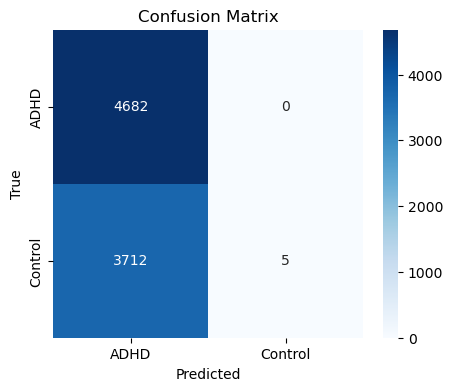

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_encoded, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

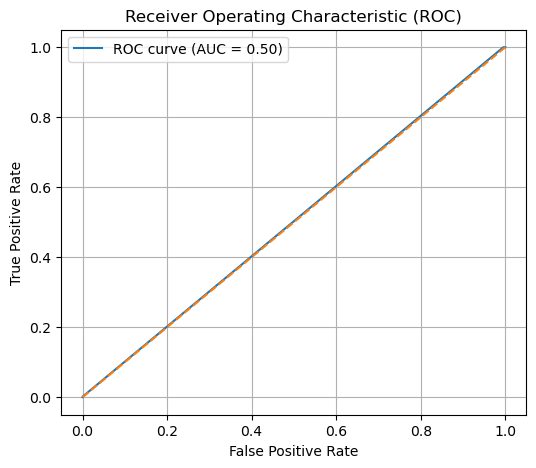

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_encoded, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.grid(True)
plt.show()